Карпеченко Д.М., dz11, v.0.1, 30.10.2022

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler as MMScaler
from sklearn.pipeline import Pipeline


#Снять ограничения на вывод колонок
pd.set_option('display.max_columns', None)
#Снять ограничения на вывод строк
pd.set_option('display.max_rows', 15)
data = pd.read_csv('D:\TeachMeSkills\DZ\dz11\MFOcredit.csv', sep = ';')


In [2]:
data

,id,date_start,date_end,gender,age,auto,housing,marstatus,regclient,jobtype,region,credits,children,delinq60plus
0,1,03-Jan-2013,12-Jan-2013,Мужской,44,Нет,Собственное,Гражданский брак/женат/замужем,Нет,Официальное,Новосибирская область,Нет,Да,Нет
1,2,03-Jan-2013,17-Jan-2013,Мужской,21,Пропуск поля,Живут с родителями,Холост,Нет,Официальное,Кемеровская область юг,Да,Нет,Нет
2,3,03-Jan-2013,17-Jan-2013,Мужской,25,Пропуск поля,Собственное,Холост,Да,Официальное,Кемеровская область север,Пропуск поля,Нет,Нет
3,4,03-Jan-2013,17-Jan-2013,Женский,47,Пропуск поля,Собственное,Гражданский брак/женат/замужем,Да,Официальное,Кемеровская область север,Нет,Нет,Нет
4,5,03-Jan-2013,17-Jan-2013,Мужской,22,Нет,Арендуемое,Гражданский брак/женат/замужем,Нет,Официальное,Кемеровская область север,Да,Да,Нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35207,35208,03-Jan-2014,17-Jan-2014,Мужской,30,Да,Долевая собственность,Гражданский брак/женат/замужем,Да,Официальное,Алтайский край,Да,Да,Нет
35208,35209,03-Jan-2014,17-Jan-2014,Женский,57,Нет,Собственное,Разведен,Да,Пропуск поля,Алтайский край,Да,Нет,Нет
35209,35210,03-Jan-2014,17-Jan-2014,Женский,38,Пропуск поля,Пропуск поля,Пропуск поля,Да,Пропуск поля,Новосибирская область,Нет,Да,Нет
35210,35211,03-Jan-2014,17-Jan-2014,Женский,19,Пропуск поля,Пропуск поля,Пропуск поля,Да,Пропуск поля,Кемеровская область юг,Нет,Нет,Нет


Удалим столбец id и установим тип datetime64 для столбцов date_start и date_end

In [3]:
col = data.columns.tolist()
col_del=col[1:]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35212 entries, 0 to 35211
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            35212 non-null  int64 
 1   date_start    35212 non-null  object
 2   date_end      35212 non-null  object
 3   gender        35212 non-null  object
 4   age           35212 non-null  int64 
 5   auto          35212 non-null  object
 6   housing       35212 non-null  object
 7   marstatus     35212 non-null  object
 8   regclient     35212 non-null  object
 9   jobtype       35212 non-null  object
 10  region        35212 non-null  object
 11  credits       35212 non-null  object
 12  children      35212 non-null  object
 13  delinq60plus  35212 non-null  object
dtypes: int64(2), object(12)
memory usage: 3.8+ MB


In [5]:
data = pd.read_csv('D:\TeachMeSkills\DZ\dz11\MFOcredit.csv', usecols = col_del, parse_dates = ['date_start','date_end'],sep = ';', dayfirst=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35212 entries, 0 to 35211
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_start    35212 non-null  datetime64[ns]
 1   date_end      35212 non-null  datetime64[ns]
 2   gender        35212 non-null  object        
 3   age           35212 non-null  int64         
 4   auto          35212 non-null  object        
 5   housing       35212 non-null  object        
 6   marstatus     35212 non-null  object        
 7   regclient     35212 non-null  object        
 8   jobtype       35212 non-null  object        
 9   region        35212 non-null  object        
 10  credits       35212 non-null  object        
 11  children      35212 non-null  object        
 12  delinq60plus  35212 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(10)
memory usage: 3.5+ MB


Обработаем наши данные на дублирующие строки и удалим их

In [7]:
data_dubl=data[data.duplicated()]
data_dubl.shape

(107, 13)

In [8]:
data=data.drop_duplicates(keep='first')
data2=data.copy()

In [9]:
viewDate = pd.to_datetime(data2['date_start']) 
data2['year'] = viewDate.dt.year.astype("category") 
data2['quarter'] = viewDate.dt.quarter.astype("category")
data2['month'] = viewDate.dt.month.astype("category")
data2['weekday'] = viewDate.dt.dayofweek.astype("category")

In [10]:
'''del data3['date_start'], data3['date_end']'''

"del data3['date_start'], data3['date_end']"

Заменим столбцы с датами начала и окончания кредита, на разность (срок), т.к. сами даты не информативны

In [11]:
t=(data['date_end']-data['date_start']).dt.days
data.insert(2,'days',t)
data.drop(labels=['date_start','date_end'], axis=1, inplace=True)
t2=(data2['date_end']-data2['date_start']).dt.days
data2.insert(2,'days',t2)
data2.drop(labels=['date_start','date_end'], axis=1, inplace=True)

In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35105 entries, 0 to 35211
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   days          35105 non-null  int64   
 1   gender        35105 non-null  object  
 2   age           35105 non-null  int64   
 3   auto          35105 non-null  object  
 4   housing       35105 non-null  object  
 5   marstatus     35105 non-null  object  
 6   regclient     35105 non-null  object  
 7   jobtype       35105 non-null  object  
 8   region        35105 non-null  object  
 9   credits       35105 non-null  object  
 10  children      35105 non-null  object  
 11  delinq60plus  35105 non-null  object  
 12  year          35105 non-null  category
 13  quarter       35105 non-null  category
 14  month         35105 non-null  category
 15  weekday       35105 non-null  category
dtypes: category(4), int64(2), object(10)
memory usage: 3.6+ MB


In [13]:
import sqlite3
#MFOcredit='D:\TeachMeSkills\DZ\dz11\MFOcredit.csv'
con = sqlite3.connect('db')
data.to_sql('MFOcredit', con, index=False, if_exists='replace')

35105

In [14]:
sql2 = '''select age, count(*) as cnt from MFOcredit group by age'''
graf=pd.read_sql(sql2,con)
graf

,age,cnt
0,18,6
1,19,424
2,20,661
3,21,1124
4,22,1301
...,...,...
53,71,4
54,72,5
55,73,6
56,74,2


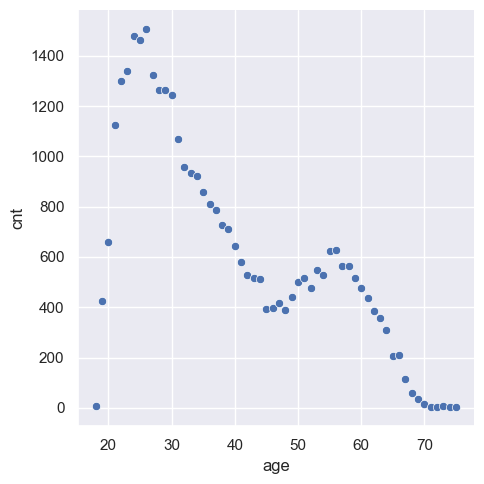

In [15]:
# Apply the default theme
sns.set_theme()

# Create a visualization
sns.relplot(
    data=graf,
    x="age", y="cnt"
)

In [16]:
data.hist(bins = 20, figsize = (10, 10))

array([[<AxesSubplot:title={'center':'days'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

# Обработаем пропуски полей

В поле auto 13998 строк со значением Пропуск поля, housing - 7536,marstatus - 7497, jobtype - 14377, credits - 945, children - 744.

In [17]:
sql2 = '''select auto, count(*) as cnt from MFOcredit group by auto'''
pd.read_sql(sql2,con)

,auto,cnt
0,Да,3668
1,Нет,17439
2,Пропуск поля,13998


In [18]:
sql3 = '''select auto, count(*) as cnt from MFOcredit where gender=='Женский' group by auto'''
pd.read_sql(sql3,con)

,auto,cnt
0,Да,985
1,Нет,9870
2,Пропуск поля,7373


In [19]:
sql3 = '''select auto, count(*) as cnt from MFOcredit where housing=='Собственное' group by auto'''
pd.read_sql(sql3,con)

,auto,cnt
0,Да,2387
1,Нет,10744
2,Пропуск поля,4936


Минутка сексизма) В поле auto для женщин заменим пропуски на Нет, для мужчин - Да. Т.к. из 17439 строк Нет в поле auto 9870 приходится на женщин и больше половину всех пропусков в этом поле у женщин.

In [20]:
data.loc[(data['auto']=='Пропуск поля')&(data['gender']=='Женский'), 'auto']='Нет'
data.loc[(data['auto']=='Пропуск поля')&(data['gender']=='Мужской'), 'auto']='Да'  

По колонке housing Пропущенные поля распределились примерно одинаково, если рассматривать по половому признаку, поэтому впринципе заменю все на собственное, т.к. это саммое большое значения в двух выборках

In [21]:
con = sqlite3.connect('db')
data.to_sql('MFOcredit', con, index=False, if_exists='replace')
sql2 = '''select housing,gender, count(*) as cnt from MFOcredit where gender = 'Женский' group by housing'''
sql3 = '''select housing,gender, count(*) as cnt from MFOcredit where gender = 'Мужской' group by housing'''
pd.read_sql(sql2,con)


,housing,gender,cnt
0,Арендуемое,Женский,785
1,Долевая собственность,Женский,1328
2,Живут с родителями,Женский,1161
3,Муниципальное,Женский,836
4,Пропуск поля,Женский,3775
5,Собственное,Женский,10343


In [22]:
pd.read_sql(sql3,con)

,housing,gender,cnt
0,Арендуемое,Мужской,1233
1,Долевая собственность,Мужской,1626
2,Живут с родителями,Мужской,2011
3,Муниципальное,Мужской,522
4,Пропуск поля,Мужской,3761
5,Собственное,Мужской,7724


In [23]:
data.loc[(data['housing']=='Пропуск поля'), 'housing']='Собственное'

In [24]:
data[data['housing']=='Пропуск поля']

,days,gender,age,auto,housing,marstatus,regclient,jobtype,region,credits,children,delinq60plus


В колонке jobtype заменим все пропуски на Официальное

In [25]:
sql2 = '''select jobtype, count(*) as cnt from MFOcredit group by jobtype'''
pd.read_sql(sql2,con)

,jobtype,cnt
0,Неофициальное,1167
1,Официальное,19561
2,Пропуск поля,14377


In [26]:
data.loc[(data['jobtype']=='Пропуск поля'), 'jobtype']='Официальное'

In [27]:
data[data['jobtype']=='Пропуск поля']

,days,gender,age,auto,housing,marstatus,regclient,jobtype,region,credits,children,delinq60plus


В поле credits заменим на нет

In [28]:
sql2 = '''select credits, count(*) as cnt from MFOcredit group by credits'''
pd.read_sql(sql2,con)

,credits,cnt
0,Да,16087
1,Нет,18073
2,Пропуск поля,945


In [29]:
data.loc[(data['credits']=='Пропуск поля'), 'credits']='Нет'

In [30]:
data[data['credits']=='Пропуск поля']

,days,gender,age,auto,housing,marstatus,regclient,jobtype,region,credits,children,delinq60plus


Аналогично поступим с детьми

In [31]:
sql2 = '''select children, count(*) as cnt from MFOcredit group by children'''
pd.read_sql(sql2,con)

,children,cnt
0,Да,13292
1,Нет,21069
2,Пропуск поля,744


In [32]:
data.loc[(data['children']=='Пропуск поля'), 'children']='Нет'

In [33]:
data[data['children']=='Пропуск поля']

,days,gender,age,auto,housing,marstatus,regclient,jobtype,region,credits,children,delinq60plus


In [34]:
data.delinq60plus=np.where(data.delinq60plus=='Нет', 0,1)
data2.delinq60plus=np.where(data2.delinq60plus=='Нет', 0,1)
x,y=data.copy(),data.copy()
y=data.delinq60plus
x.drop(labels=['delinq60plus'],axis=1, inplace=True)
x_2,y_2=data2.copy(), data2.delinq60plus
x_2.drop(labels=['delinq60plus'],axis=1, inplace=True)

Почистим копию датасета

In [35]:
#x.drop(labels='days', axis=1, inplace=True)

In [36]:
x=pd.concat([x, 
            pd.get_dummies(x['gender'], prefix='gender'),
            pd.get_dummies(x['auto'], prefix='auto'),
            pd.get_dummies(x['housing'], prefix='housing'),
            pd.get_dummies(x['marstatus'], prefix='marstatus'),
            pd.get_dummies(x['regclient'], prefix='regclient'),
            pd.get_dummies(x['jobtype'], prefix='jobtype'),
            pd.get_dummies(x['region'], prefix='region'),
            pd.get_dummies(x['credits'], prefix='credits'),
            pd.get_dummies(x['children'], prefix='children')], axis=1)

In [37]:
x=x.drop(['gender','auto','housing','marstatus','regclient','jobtype','region','credits','children'],axis=1)

In [38]:
x

,days,age,gender_Женский,gender_Мужской,auto_Да,auto_Нет,housing_Арендуемое,housing_Долевая собственность,housing_Живут с родителями,housing_Муниципальное,housing_Собственное,marstatus_Вдова/вдовец,marstatus_Гражданский брак/женат/замужем,marstatus_Пропуск поля,marstatus_Разведен,marstatus_Холост,regclient_Да,regclient_Нет,jobtype_Неофициальное,jobtype_Официальное,region_Алтайский край,region_Кемеровская область север,region_Кемеровская область юг,region_Красноярский край,region_Новосибирская область,credits_Да,credits_Нет,children_Да,children_Нет
0,9,44,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0
1,14,21,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
2,14,25,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1
3,14,47,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1
4,14,22,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35207,14,30,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0
35208,14,57,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1
35209,14,38,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0
35210,14,19,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1


In [39]:
y.value_counts()

0    21614
1    13491
Name: delinq60plus, dtype: int64

In [40]:
#y=pd.concat([y,
#            pd.get_dummies(y, prefix='delinq60plus')], axis=1)
#y=y.drop(['delinq60plus'],axis=1)


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y, train_size=0.7, random_state=42)
x_2_train, x_2_test, y_2_train, y_2_test  = train_test_split(x_2,y_2, train_size=0.7, random_state=42)

In [42]:
x_2_train.loc[(x_2_train['auto']=='Пропуск поля'), 'auto']='Да'
x_2_train.loc[(x_2_train['auto']=='Пропуск поля')&(x_2_train['gender']=='Мужской'), 'auto']='Да'  
x_2_train.loc[(x_2_train['housing']!='Собственное'), 'housing']='Не собственное'
x_2_train.loc[(x_2_train['jobtype']=='Пропуск поля'), 'jobtype']='Официальное'
x_2_train.loc[(x_2_train['credits']=='Пропуск поля'), 'credits']='Нет'
x_2_train.loc[(x_2_train['children']=='Пропуск поля'), 'children']='Нет'

x_2_test.loc[(x_2_test['auto']=='Пропуск поля'), 'auto']='Нет'
x_2_test.loc[(x_2_test['auto']=='Пропуск поля')&(x_2['gender']=='Мужской'), 'auto']='Да'  
x_2_test.loc[(x_2_test['housing']!='Собственное'), 'housing']='Не собственное'
x_2_test.loc[(x_2_test['jobtype']=='Пропуск поля'), 'jobtype']='Официальное'
x_2_test.loc[(x_2_test['credits']=='Пропуск поля'), 'credits']='Нет'
x_2_test.loc[(x_2_test['children']=='Пропуск поля'), 'children']='Нет'

Кодировка данных

In [43]:
x_2_train=pd.concat([x_2_train, 
            pd.get_dummies(x_2_train['gender'], prefix='gender'),
            pd.get_dummies(x_2_train['auto'], prefix='auto'),
            pd.get_dummies(x_2_train['housing'], prefix='housing'),
            pd.get_dummies(x_2_train['marstatus'], prefix='marstatus'),
            pd.get_dummies(x_2_train['regclient'], prefix='regclient'),
            pd.get_dummies(x_2_train['jobtype'], prefix='jobtype'),
            pd.get_dummies(x_2_train['region'], prefix='region'),
            pd.get_dummies(x_2_train['credits'], prefix='credits'),
            pd.get_dummies(x_2_train['children'], prefix='children'),
                    pd.get_dummies(x_2_train['year'], prefix='year'),
                    pd.get_dummies(x_2_train['quarter'], prefix='quarter'),
                    pd.get_dummies(x_2_train['month'], prefix='month'),
                    pd.get_dummies(x_2_train['weekday'], prefix='weekday')], axis=1)

x_2_test=pd.concat([x_2_test, 
            pd.get_dummies(x_2_test['gender'], prefix='gender'),
            pd.get_dummies(x_2_test['auto'], prefix='auto'),
            pd.get_dummies(x_2_test['housing'], prefix='housing'),
            pd.get_dummies(x_2_test['marstatus'], prefix='marstatus'),
            pd.get_dummies(x_2_test['regclient'], prefix='regclient'),
            pd.get_dummies(x_2_test['jobtype'], prefix='jobtype'),
            pd.get_dummies(x_2_test['region'], prefix='region'),
            pd.get_dummies(x_2_test['credits'], prefix='credits'),
            pd.get_dummies(x_2_test['children'], prefix='children'),
                   pd.get_dummies(x_2_test['year'], prefix='year'),
                    pd.get_dummies(x_2_test['quarter'], prefix='quarter'),
                    pd.get_dummies(x_2_test['month'], prefix='month'),
                    pd.get_dummies(x_2_test['weekday'], prefix='weekday')], axis=1)

In [44]:
x_2_train=x_2_train.drop(['gender','auto','housing','marstatus','regclient','jobtype','region','credits','children','year','quarter','month','weekday' ],axis=1)
x_2_test=x_2_test.drop(['gender','auto','housing','marstatus','regclient','jobtype','region','credits','children','year','quarter','month','weekday'],axis=1)

In [45]:
'''y_2_train=pd.concat([y_2_train,
            pd.get_dummies(y_2_train, prefix='delinq60plus')], axis=1)
y_2_train=y_2_train.drop(['delinq60plus'],axis=1)
y_2_test=pd.concat([y_2_test,
            pd.get_dummies(y_2_test, prefix='delinq60plus')], axis=1)
y_2_test=y_2_test.drop(['delinq60plus'],axis=1)'''

"y_2_train=pd.concat([y_2_train,\n            pd.get_dummies(y_2_train, prefix='delinq60plus')], axis=1)\ny_2_train=y_2_train.drop(['delinq60plus'],axis=1)\ny_2_test=pd.concat([y_2_test,\n            pd.get_dummies(y_2_test, prefix='delinq60plus')], axis=1)\ny_2_test=y_2_test.drop(['delinq60plus'],axis=1)"

In [46]:
y_2_test

13827    1
22141    0
27600    0
16006    0
16191    1
        ..
13343    1
11518    0
22028    1
16838    1
14795    1
Name: delinq60plus, Length: 10532, dtype: int32

In [47]:
'''mm_scaler = MMScaler(feature_range=(-1,1))
x_train=mm_scaler.fit_transform(x_train)
x_test=mm_scaler.fit_transform(x_test)

x_2_train=mm_scaler.fit_transform(x_2_train)
x_2_test=mm_scaler.fit_transform(x_2_test)'''

'mm_scaler = MMScaler(feature_range=(-1,1))\nx_train=mm_scaler.fit_transform(x_train)\nx_test=mm_scaler.fit_transform(x_test)\n\nx_2_train=mm_scaler.fit_transform(x_2_train)\nx_2_test=mm_scaler.fit_transform(x_2_test)'

# Моделирование

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

x_train, x_test, y_train, y_test из даты в которой замена пропусков была до разбиения

In [49]:
forest = RandomForestClassifier(max_depth=10, n_estimators=990, random_state=2020, n_jobs=-1)
forest.fit(x_train, y_train);

print('AUC на обучающей выборке: {:.3f}'.
      format(roc_auc_score(y_train, forest.predict_proba(x_train)[:, 1])))
print('AUC на контрольной выборке: {:.3f}'.
      format(roc_auc_score(y_test, forest.predict_proba(x_test)[:, 1])))

AUC на обучающей выборке: 0.758
AUC на контрольной выборке: 0.687


x_2_train, x_2_test, y_2_train, y_2_test из даты в которой замена пропусков была после разбиения и с добавлением чудо-колонок   ['year'],['quarter'], ['month'], ['weekday']

In [50]:
forest.fit(x_2_train, y_2_train);

print('AUC на обучающей выборке: {:.3f}'.
      format(roc_auc_score(y_2_train, forest.predict_proba(x_2_train)[:, 1])))
print('AUC на контрольной выборке: {:.3f}'.
      format(roc_auc_score(y_2_test, forest.predict_proba(x_2_test)[:, 1])))

AUC на обучающей выборке: 0.886
AUC на контрольной выборке: 0.854


Подбор гиперпараметров

In [51]:
from sklearn.model_selection import GridSearchCV
parametrs = {'n_estimators': range (990, 1010,5),
                'max_depth': range (1,13,1)}
grid = GridSearchCV(forest, parametrs).fit(x_2_train, y_2_train)
grid.best_params_            

{'max_depth': 10, 'n_estimators': 990}

Выводы: на AUC замена значений до разбиения на тестовую и тренеровочную выборки и после не повлияло. Так же не повлияло замена значений по категориям (например, для мужчин наличие машины замена пропусков на да, а у женщин на нет И просто намена всех пропусков на нет/да). 
До подбора гиперпараметров
0,886
0,854

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

LinearRegression

In [61]:
from sklearn.linear_model import LinearRegression
reg = make_pipeline(LinearRegression(fit_intercept=True))
reg.fit(x_2_train, y_2_train)
print('AUC на контрольной выборке: {:.3f}'.
      format(roc_auc_score(y_2_test, reg.predict(x_2_test))))

AUC на контрольной выборке: 0.850


In [68]:
reg.get_params()

{'memory': None,
 'steps': [('linearregression', LinearRegression())],
 'verbose': False,
 'linearregression': LinearRegression(),
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': 'deprecated',
 'linearregression__positive': False}

Наивный Байес

In [67]:
from sklearn.naive_bayes  import GaussianNB
clf = make_pipeline(GaussianNB(var_smoothing=0.0007390722033525783))
clf.fit(x_2_train, y_2_train)
print('AUC на контрольной выборке: {:.3f}'.
      format(roc_auc_score(y_2_test, clf.predict_proba(x_2_test)[:, 1])))

AUC на контрольной выборке: 0.831


In [60]:
clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [64]:
from sklearn.model_selection import GridSearchCV
parametrs = {'var_smoothing': np.logspace (0, -10,num=100)}
grid = GridSearchCV(clf, parametrs).fit(x_2_train, y_2_train)
grid.best_params_         

{'var_smoothing': 0.0007390722033525783}

PolynomialFeatures

In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())
poly_model.fit(x_2_train, y_2_train)

print('AUC на контрольной выборке: {:.3f}'.
      format(roc_auc_score(y_2_test, poly_model.predict(x_2_test))))

AUC на контрольной выборке: 0.852


In [69]:
poly_model.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures()),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(),
 'linearregression': LinearRegression(),
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': 'deprecated',
 'linearregression__positive': False}